The code follows more or less verbatim the tutorial [here](http://introtopython.org/visualization_earthquakes.html).

In [9]:
from pylab import rcParams
rcParams['figure.figsize'] = (15,15)

In [5]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

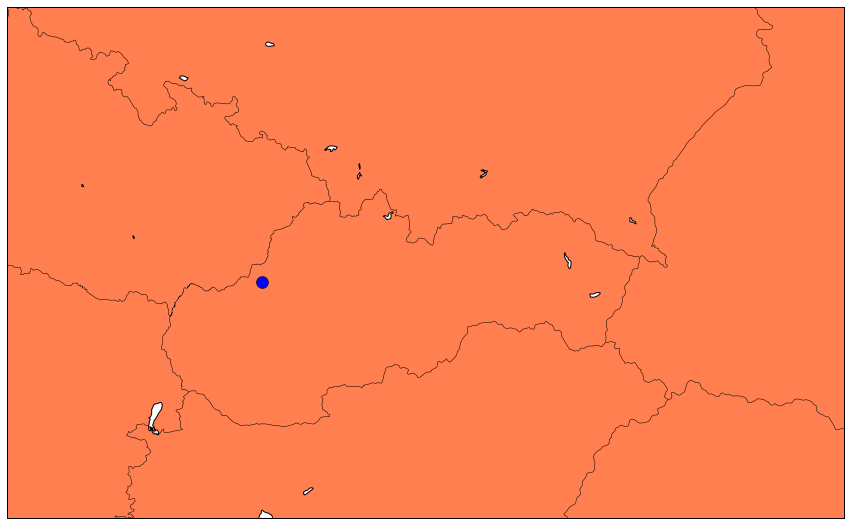

In [13]:
myMap = Basemap(projection='merc',lat_0=50,lon_0=20,resolution='h',area_thresh=1.,
                llcrnrlon=15.,llcrnrlat=47.,urcrnrlon=25.,urcrnrlat=51.)
myMap.drawcoastlines()
myMap.drawcountries()
myMap.fillcontinents(color='coral')
myMap.drawmapboundary()

myMap.drawmeridians(np.arange(0.,360.,30.))
myMap.drawparallels(np.arange(-90,90,30))

lon = 18.04
lat = 48.89

x,y = myMap(lon,lat)

myMap.plot(x,y,'bo',markersize=12)

plt.show()